In [106]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.decomposition import PCA

from scipy.spatial import distance




In [107]:
##LOADING CLEANED DATA

players_2018 = pd.read_csv('players_cleaned.csv')
players_2018 = players_2018.drop(['Unnamed: 0'], axis = 1)
#players_2018 = players_2018.fillna(0) #done in data cleaning
players_2018.shape

(540, 51)

In [108]:
players_2018.head()

Player Pos_x  Age_x Tm_x  G_x  GS  MP_x   FG   FGA    FG%  \
0   Alex Abrines\abrinal01    SG     24  OKC   75   8  1134  5.0  12.7  0.395   
1       Quincy Acy\acyqu01    PF     27  BRK   70   8  1359  4.6  13.0  0.356   
2   Steven Adams\adamsst01     C     24  OKC   76  76  2487  8.9  14.2  0.629   
3    Bam Adebayo\adebaba01     C     20  MIA   69  19  1368  6.4  12.5  0.512   
4  Arron Afflalo\afflaar01    SG     32  ORL   53   3   682  4.7  11.6  0.401   

    3P   3PA    3P%   2P   2PA    2P%   FT  FTA    FT%  ORB  DRB   TRB  AST  \
0  3.7   9.7  0.380  1.4   3.1  0.443  1.7  2.0  0.848  1.1  3.9   5.0  1.2   
1  3.6  10.4  0.349  1.0   2.6  0.384  1.8  2.1  0.817  1.4  7.8   9.2  2.0   
2  0.0   0.0  0.000  8.9  14.2  0.631  3.2  5.7  0.559  7.7  6.0  13.7  1.8   
3  0.0   0.3  0.000  6.4  12.2  0.523  4.7  6.6  0.721  4.3  9.7  14.0  3.7   
4  1.9   5.0  0.386  2.7   6.6  0.413  1.6  1.9  0.846  0.3  4.5   4.7  2.2   

   STL  BLK  TOV   PF   PTS   ORtg  DRtg   PER    TS%   3PAr    FTr  ORB%  \
0  1.7  0.4  1.1  5.4  15.4  116.0   110   9.0  0.567  0.759  0.158   2.5   
1  1.2  1.0  2.1  5.3  14.7   99.0   110   8.2  0.525  0.800  0.164   3.1   
2  1.8  1.6  2.6  4.3  21.1  125.0   107  20.6  0.630  0.003  0.402  16.6   
3  1.2  1.5  2.4  5.1  17.5  116.0   105  15.7  0.570  0.021  0.526   9.7   
4  0.3  0.6  1.5  4.0  12.8   98.0   115   5.8  0.516  0.432  0.160   0.6   

   DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  \
0   8.9   5.6   3.4   1.7   0.6   7.4  12.7  1.3  1.0  2.2  0.094  -0.5  -1.7   
1  17.1  10.0   6.0   1.2   1.6  13.3  14.4 -0.1  1.1  1.0  0.036  -2.0  -0.2   
2  13.9  15.3   5.5   1.8   2.8  13.3  16.7  6.7  3.0  9.7  0.187   2.2   1.1   
3  21.6  15.6  11.0   1.2   2.5  13.6  15.9  2.3  1.9  4.2  0.148  -1.6   1.8   
4  10.1   5.3   6.2   0.3   1.1  10.8  12.5 -0.1  0.2  0.1  0.009  -4.1  -1.8   

   BPM  VORP  as_caliber  
0 -2.2  -0.1           0  
1 -2.2  -0.1           0  
2  3.3   3.3           1  
3  0.2   0.8           0  
4 -5.8  -0.7           0

In [109]:
#FEATURE SELECTION

#DROP FEATURES THAT ARE RELATED TO PLAYER SUCCESS
## as_caliber, VORP, BPM, WS/48, WS, GS G_x, MP_x 

#drop success metrics, features that have a strong correlation with how good a player is not style of play
#this isnt that good
#players_select = players_2018.drop(['as_caliber', 'VORP', 'BPM', 'WS/48', 'MP_x', 'GS', 'G_x', 'MP_x'], axis = 1)

#drop percent metrics
#this is pretty good
#gives me a weird role player cluster
#gives me cluster for all around guard and all around big...
#players_select = players_2018.drop(['Age_x', 'FG','FGA', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'PER','as_caliber', 'TS%', 'VORP', 'OBPM', 'DBPM', 'BPM', 'WS', 'WS/48', 'USG%', 'GS', 'G_x', 'MP_x'], axis = 1)

#drop raw metrics
#players_select = players_2018.drop(['Age_x', 'FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PER','as_caliber', 'TS%', 'VORP', 'OBPM', 'DBPM', 'BPM', 'WS', 'WS/48', 'USG%', 'GS', 'G_x', 'MP_x'], axis = 1)


#FINAL FEATURE SELECTION ***********************
#MIX drop raw and percent metrics 
#keep OBMP DBPM, DROP TOV TOV%, keep ORD DRB TRB AST STL BLK - drop respective %, 
#                drop PTS so stars and high scorers and such won't get clustered together
#                replace FG% with TS%
players_select = players_2018.drop(['Age_x', 'FG','FGA','FG%','3P','3PA','2P','2PA','FT','FTA', 'PTS', 'ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV','TOV%','PER','as_caliber', 'VORP', 'OBPM', 'DBPM', 'BPM', 'WS', 'WS/48', 'USG%', 'GS', 'G_x', 'MP_x'], axis = 1)


#don't drop any metrics
#pretty decent, has weird cluster of stars that are central on pc1 pc2
#players_select = players_2018


players_select.head()


Player Pos_x Tm_x    3P%    2P%    FT%  ORB  DRB   TRB  \
0   Alex Abrines\abrinal01    SG  OKC  0.380  0.443  0.848  1.1  3.9   5.0   
1       Quincy Acy\acyqu01    PF  BRK  0.349  0.384  0.817  1.4  7.8   9.2   
2   Steven Adams\adamsst01     C  OKC  0.000  0.631  0.559  7.7  6.0  13.7   
3    Bam Adebayo\adebaba01     C  MIA  0.000  0.523  0.721  4.3  9.7  14.0   
4  Arron Afflalo\afflaar01    SG  ORL  0.386  0.413  0.846  0.3  4.5   4.7   

   AST  STL  BLK   PF   ORtg  DRtg    TS%   3PAr    FTr  OWS  DWS  
0  1.2  1.7  0.4  5.4  116.0   110  0.567  0.759  0.158  1.3  1.0  
1  2.0  1.2  1.0  5.3   99.0   110  0.525  0.800  0.164 -0.1  1.1  
2  1.8  1.8  1.6  4.3  125.0   107  0.630  0.003  0.402  6.7  3.0  
3  3.7  1.2  1.5  5.1  116.0   105  0.570  0.021  0.526  2.3  1.9  
4  2.2  0.3  0.6  4.0   98.0   115  0.516  0.432  0.160 -0.1  0.2

In [110]:
##STANDARDIZE DATA FOR LDA
p_standardized  = pd.DataFrame(StandardScaler().fit_transform(players_select.select_dtypes(exclude='object')))
#p_standardized = players_select.select_dtypes(exclude='object')

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen', shrinkage='auto' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


0.6037037037037037

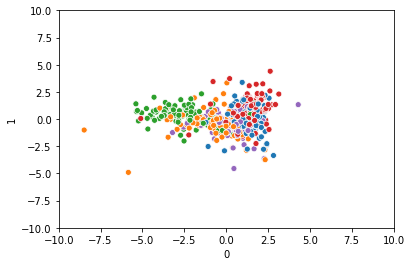

In [112]:
plt.figure()
plt.ylim(-10, 10)
plt.xlim(-10, 10)

sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6129629629629629

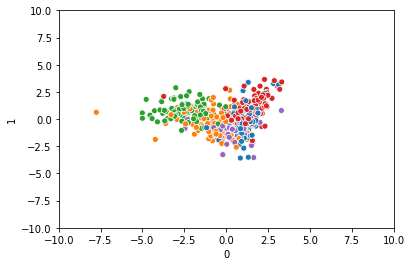

In [114]:
plt.figure()
plt.ylim(-10, 10)
plt.xlim(-10, 10)
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


For n_clusters = 2 The average silhouette_score is : 0.4738714476278667
For n_clusters = 3 The average silhouette_score is : 0.47955570729771096
For n_clusters = 4 The average silhouette_score is : 0.4216600979316531
For n_clusters = 5 The average silhouette_score is : 0.3659951305837495
For n_clusters = 6 The average silhouette_score is : 0.344988804685859
For n_clusters = 7 The average silhouette_score is : 0.33596335016062834
For n_clusters = 8 The average silhouette_score is : 0.33168814842936317
For n_clusters = 9 The average silhouette_score is : 0.3482069469900572


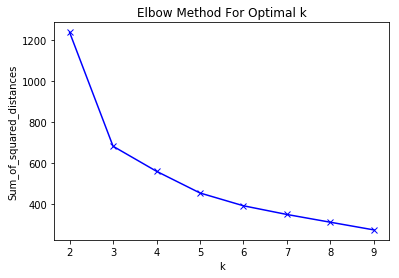

In [115]:
## Number of Cluster Analysis LDA = 2

#DECIDED ON # of Components = 2 to represent 29% of variance
# pca = PCA(n_components = 2)
# principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', ])#'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df, columns = ['principal component 1', 'principal component 2', ])

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(LDA_reduced_df)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(LDA_reduced_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [116]:
##CLUSTER ANALYSIS


k = 7
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(LDA_reduced_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

LDA_reduced_df['Cluster'] = labels
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']
LDA_reduced_df

principal component 1  principal component 2  Cluster  \
0                 0.565333              -1.970638        0   
1                -0.114703              -1.651191        0   
2                -3.334645              -0.046175        1   
3                -2.048768               1.159375        6   
4                 0.735847              -0.854539        4   
5                -1.724206               1.131441        6   
6                -2.319346               0.340066        1   
7                -2.966708               0.276103        1   
8                 1.051824               1.780129        2   
9                -0.168010              -0.049621        3   
10               -0.814775              -1.999522        3   
11                0.157601              -0.637108        4   
12               -0.441957               0.093551        3   
13               -0.488962              -1.566582        3   
14               -5.005019               0.563270        1   
15               -1.815370               1.033104        6   
16               -0.445555              -1.496369        3   
17                0.340545              -1.497705        0   
18                2.130119              -0.684436        4   
19                0.573468              -2.252105        0   
20                0.785044              -0.204684        4   
21                0.679605              -0.810370        4   
22               -1.656776              -0.072318        6   
23                2.086650               0.620193        2   
24                0.631732              -1.602024        0   
25                0.657133              -0.732150        4   
26                1.663220              -0.130249        4   
27                1.204031               0.290100        2   
28                1.197596               0.961950        2   
29                3.020381               3.094917        5   
30                0.043426              -0.947911        3   
31                0.280788               0.000707        4   
32                1.422204               0.869767        2   
33                1.309666              -0.662156        4   
34               -1.887936               1.034041        6   
35                0.888188              -0.024684        4   
36                0.914515              -0.007099        4   
37                0.595785              -1.235920        0   
38               -0.876609               0.076085        3   
39                1.274390              -0.919382        4   
40               -2.209263               2.519780        6   
41                0.645245               0.524133        2   
42                0.165529              -1.464167        0   
43                0.321285              -0.598801        4   
44                1.042931              -0.342375        4   
45               -2.659851               0.877636        1   
46                0.798071               0.265732        4   
47               -3.534639               0.629123        1   
48               -0.055564              -0.965769        3   
49               -3.244359               0.986952        1   
..                     ...                    ...      ...   
490               1.608731               0.999895        2   
491               0.936113              -1.290438        0   
492              -1.777841              -0.760480        3   
493              -1.215886               0.510567        6   
494               0.501315               1.121074        2   
495               1.899894               0.555377        2   
496               1.399390               0.826676        2   
497               2.292450               3.650726        5   
498               0.562535               0.268655        4   
499               0.550301              -1.055897        4   
500               1.339496               0.024692        4   
501              -2.421914              -0.438520        1   
502              -0.738722           

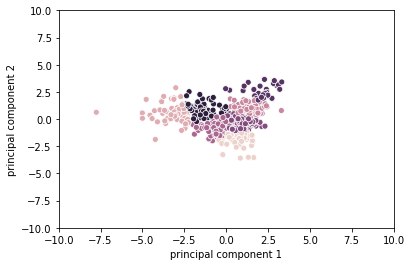

In [117]:
plt.figure()
plt.ylim(-10, 10)
plt.xlim(-10, 10)
sns.scatterplot(x='principal component 1', y ='principal component 2', hue ="Cluster", data = LDA_reduced_df, legend = False )


In [118]:
players_2018['PC1'] = LDA_reduced_df['principal component 1']
players_2018['PC2'] = LDA_reduced_df['principal component 2']
players_2018['Cluster'] = LDA_reduced_df['Cluster']

In [119]:
players_2018.to_csv('players_clustered.csv')